In [1]:
import os
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools as it
import math as math
from scipy.special import comb
import numpy as np

import sys, os, time, numpy as np, matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import numpy as np, matplotlib.pyplot as plt, matplotlib.colors,  matplotlib.cm as cm, os, sys
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from mpl_toolkits.mplot3d import axes3d
import mpl_toolkits.mplot3d.art3d as art3d

home = os.path.abspath( os.getcwd() + "/.." )
sys.path.append(home)
from sklearn.cluster import KMeans

import numpy as np
import matplotlib.pyplot as plt
import cmath
import math
import pandas as pd

In [2]:
def transfer_matrix_method(a_x, a_y, m, n, t, w, f):
  k0 = (2*cmath.pi*f)/343 #wavenumber in air
  k0 = k0*1
  ds = []
  ls = []
  for i in range(m+n):
    d = (a_x/(m+n-1)) - ((m+n)/(m+n-1))*w
    l = a_y-2*t-d
    ls.append(l)
    ds.append(d)

  d_in = ds[0]
  l_in = ls[0]
  d_out = ds[-1]

  #print(l_in)
  #print(d_out)
  
  Ms = []

  for ii in range(len(ds)-1):
    summation = 0
    for i in range(10): #should be infinity

      k_yn_dash = (i*cmath.pi)/(ls[ii]+ds[ii]+(2*t))
      k_xn_dash = (k0**2 - k_yn_dash**2)**(1/2)
      #k_xn_dash = k_xn_dash*1.1
      #print(k_xn_dash)

      if i==0:
        psi_n_dash_dash = 1

      else:
        psi_n_dash_dash = ((2**(1/2))/(ds[ii]*k_yn_dash))*((cmath.sin(k_yn_dash*(t+ls[ii]+ds[ii])))-(cmath.sin(k_yn_dash*(t+ls[ii]))))
      summation += ((ds[ii]*k0)*(psi_n_dash_dash**2))/(a_y*k_xn_dash)

    delta1 = 1 + summation
    delta2 = 1 - summation

    alpha = 0
    beta = 0

    for i in range(10): #should be infinity
      k_yn = (i * cmath.pi)/(ls[ii]+ds[ii])
      k_xn = (k0**2 - k_yn**2)**(1/2)
      #k_xn = k_xn*1.1

      if i==0:
        phi_n1 = 1
        phi_n2 = 1

      else:
        phi_n1 = ((2)**(1/2)/ds[ii])*(cmath.sin(k_yn*ds[ii])/k_yn)
        phi_n2 = ((2)**(1/2)/(ds[ii]*k_yn))*((cmath.sin(k_yn*(ls[ii]+ds[ii])))-cmath.sin(k_yn*ls[ii]))
        
      alpha += ((k0*ds[ii])*(1+cmath.exp(2j*k_xn*ds[ii]))*phi_n1**2)/(k_xn*(ls[ii]+ds[ii])*(1-cmath.exp(2j*k_xn*ds[ii])))
      beta += (k0*ds[ii]*2*cmath.exp(1j*k_xn*ds[ii])*phi_n1*phi_n2)/(k_xn*(ls[ii]+ds[ii])*(1-cmath.exp(2j*k_xn*ds[ii])))

    M1_11 = (((alpha+1)**2-beta**2)*cmath.exp(-1j*k0*w))/(2*beta)
    M1_12 = (1-alpha**2+beta**2)/(2*beta)
    M1_21 = ((alpha**2)-1-(beta**2))/(2*beta)
    M1_22 = (((beta**2)-((alpha-1)**2))*cmath.exp(1j*k0*w))/(2*beta)
    M1 = [[M1_11, M1_12], [M1_21, M1_22]]
    Ms.append(M1)

  summation1 = 0
  for i in range(10):
    k_yn_dash = (i*cmath.pi)/(l_in+d_in+(2*t))
    k_xn_dash = (k0**2 - k_yn_dash**2)**(0.5)
    #k_xn_dash = k_xn_dash*1.1

    if i==0:
      #psi_n_dash = (1/d)*(((2-delta0n)**(1/2)*(t+d))-((2-delta0n)**(1/2)*(t))) #THIS
      psi_n_dash = 1
    else:
      #psi_n_dash = (1/d) * (((2-delta0n)**(1/2)*cmath.sin(k_yn_dash*(t+d))/k_yn_dash)-((2-delta0n)**(1/2)*cmath.sin(k_yn_dash*(t))/k_yn_dash))
      psi_n_dash = ((2)**(1/2)/d_in)*((cmath.sin(k_yn_dash*(t+d_in))/k_yn_dash)-(cmath.sin(k_yn_dash*(t))/k_yn_dash))

    summation1 += (k0*psi_n_dash**2)/(k_xn_dash)

  alpha_dash = (a_y/d_in) - summation1
  beta_dash = (a_y/d_in) + summation1

  M2_11 = (1-(beta_dash/2)) * cmath.exp(-1j*k0*w)
  M2_12 = (beta_dash/2) * cmath.exp(-1j*k0*w)
  M2_21 = 1 + (alpha_dash/2)
  M2_22 = -alpha_dash/2

  M2 = [[M2_11, M2_12], [M2_21, M2_22]]

  N = Ms[-1]
  for i in range(len(Ms)-1):
    N = np.matmul(N, Ms[len(Ms)-1-i])
  
  N = np.matmul(N, M2)

  #N = np.matmul(np.matmul(np.matmul(Ms[-1], Ms[-2]), Ms[-3]), M2)

  n11 = N[0][0]
  n12 = N[0][1]
  n21 = N[1][0]
  n22 = N[1][1]

  T = (2*d_out*((n21*n12)-(n11*n22)))/(a_y*((n12*delta1*cmath.exp(-1j*k0*w))+(n22*delta2)))
  R = -((n11*delta1)+(n21*delta2*cmath.exp(1j*k0*w)))/((n12*delta1)+(n22*delta2*cmath.exp(1j*k0*w)))
  
  magnitude = np.abs(T)
  phase = np.angle(T)
  #if phase<0:
  #  phase = phase+2*np.pi


  magnitude_reflection = np.abs(R) #10 * math.log10(np.abs(R))
  phase_reflection = np.angle(R)
  if phase_reflection<0:
    phase_reflection = phase_reflection+2*np.pi

  return magnitude, phase, magnitude_reflection, phase_reflection

In [3]:
wavelength_value = 8.661*10**(-3)
a_x = wavelength_value 
a_y = wavelength_value*0.7 
t = 0.0007810949749 
m = 1 #number of bars
n = 1 #number of bars
w = 0.002652927136
f = 40000

T, p, _, _ = transfer_matrix_method(a_x, a_y, m, n, t, w, f)
if p<0:
  p = ((p/np.pi)%2)
else:
  p = p /np.pi
print('Amplitude of transmission coefficient:', T)
print('Phase of transmission coefficient:', p)

Amplitude of transmission coefficient: 0.7326065018785177
Phase of transmission coefficient: 1.996010933882756


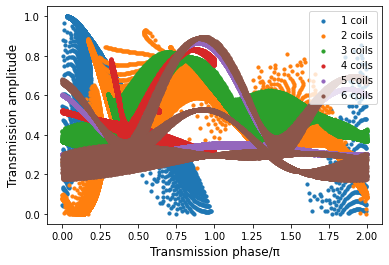

(201544, 6)


In [4]:
dataset = np.array([0, 0, 0, 0, 0, 0])

f = 40000
lam = 8.661 * 10**(-3)
a_x = lam*1
a_y = lam*0.7
#w = lam/20
ts = [float(i) for i in np.linspace(0.241*10**(-3), (a_y/2)-(0.8*10**(-3)), 200)]
#ws = [float(i) for i in np.linspace(lam/40, (a_x-((m+n-1)*1*10**(-3)))/(m+n), 10)]

Ts11 = []
ps11 = []
Ts12 = []
ps12 = []
Ts22 = []
ps22 = []
Ts23 = []
ps23 = []
Ts33 = []
ps33 = []
Ts34 = []
ps34 = []

ts11 = []
ws11 = []
ts12 = []
ws12 = []
ts22 = []
ws22 = []
ts23 = []
ws23 = []
ts33 = []
ws33 = []
ts34 = []
ws34 = []

w_min = 0.4*10**(-3)
w_num = 200
d_min = 1.316*10**(-3)

m = 1
n = 1
ws = [float(i) for i in np.linspace(w_min, (a_x-((m+n-1)*d_min))/(m+n), w_num)]
for w in ws:
  for t in ts:
    d = (a_x/(m+n-1)) - ((m+n)/(m+n-1))*w
    l = a_y-2*t-d
    if d>0 and l>0:
      T11, p11, R, p_r = transfer_matrix_method(a_x, a_y, m, n, t, w, f)
      #dataset = np.vstack((dataset, np.array([T11, p11, m, n, t, w])))
      Ts11.append(T11)
      #ps11.append(p11/np.pi)
      if p11<0:
        p11 = ((p11/np.pi)%2)
        ps11.append(p11)
      else:
        p11 = p11 /np.pi
        ps11.append(p11)
      ts11.append(t)
      ws11.append(w)
      dataset = np.vstack((dataset, np.array([T11, round(p11, 2), m, n, t, w])))

m = 1
n = 2
ws = [float(i) for i in np.linspace(w_min, (a_x-((m+n-1)*d_min))/(m+n), w_num)]
for w in ws:
  for t in ts:
    d = (a_x/(m+n-1)) - ((m+n)/(m+n-1))*w
    l = a_y-2*t-d
    if d>0 and l>0:
      T12, p12, R, p_r = transfer_matrix_method(a_x, a_y, m, n, t, w, f)
      #dataset = np.vstack((dataset, np.array([T12, p12, m, n, t, w])))
      Ts12.append(T12)
      #ps12.append(p12/np.pi)
      if p12<0:
        p12 = ((p12/np.pi)%2)
        ps12.append(p12)
      else:
        p12 = p12 /np.pi
        ps12.append(p12)
      ts12.append(t)
      ws12.append(w)
      dataset = np.vstack((dataset, np.array([T12, round(p12, 2), m, n, t, w])))

m = 2
n = 2
ws = [float(i) for i in np.linspace(w_min, (a_x-((m+n-1)*d_min))/(m+n), w_num)]
for w in ws:
  for t in ts:
    d = (a_x/(m+n-1)) - ((m+n)/(m+n-1))*w
    l = a_y-2*t-d
    if d>0 and l>0:
      T22, p22, R, p_r = transfer_matrix_method(a_x, a_y, m, n, t, w, f)
      #dataset = np.vstack((dataset, np.array([T22, p22, m, n, t, w])))
      Ts22.append(T22)
      #ps22.append(p22/np.pi)
      if p22<0:
        p22 = ((p22/np.pi)%2)
        ps22.append(p22)
      else:
        p22 = p22 /np.pi
        ps22.append(p22)
      ts22.append(t)
      ws22.append(w)
      dataset = np.vstack((dataset, np.array([T22, round(p22, 2), m, n, t, w])))


m = 2
n = 3
ws = [float(i) for i in np.linspace(w_min, (a_x-((m+n-1)*d_min))/(m+n), w_num)]
for w in ws:
  for t in ts:
    d = (a_x/(m+n-1)) - ((m+n)/(m+n-1))*w
    l = a_y-2*t-d
    if d>0 and l>0:
      T23, p23, R, p_r = transfer_matrix_method(a_x, a_y, m, n, t, w, f)
      #dataset = np.vstack((dataset, np.array([T23, p23, m, n, t, w])))
      Ts23.append(T23)
      #ps23.append(p23/np.pi)
      if p23<0:
        p23 = ((p23/np.pi)%2)
        ps23.append(((p23/np.pi)%2))
      else:
        p23 = p23 /np.pi
        ps23.append(p23)
      ts23.append(t)
      ws23.append(w)
      dataset = np.vstack((dataset, np.array([T23, round(p23, 2), m, n, t, w])))

m = 3
n = 3
ws = [float(i) for i in np.linspace(w_min, (a_x-((m+n-1)*d_min))/(m+n), w_num)]
for w in ws:
  for t in ts:
    d = (a_x/(m+n-1)) - ((m+n)/(m+n-1))*w
    l = a_y-2*t-d
    if d>0 and l>0:
      T33, p33, R, p_r = transfer_matrix_method(a_x, a_y, m, n, t, w, f)
      #dataset = np.vstack((dataset, np.array([T33, p33, m, n, t, w])))
      Ts33.append(T33)
      #ps33.append(p33/np.pi)
      if p33<0:
        p33 = ((p33/np.pi)%2)
        ps33.append(p33)
      else:
        p33 = p33 /np.pi
        ps33.append(p33)
      ts33.append(t)
      ws33.append(w)
      dataset = np.vstack((dataset, np.array([T33, round(p33, 2), m, n, t, w])))

m = 3
n = 4
ws = [float(i) for i in np.linspace(w_min, (a_x-((m+n-1)*d_min))/(m+n), w_num)]
for w in ws:
  for t in ts:
    d = (a_x/(m+n-1)) - ((m+n)/(m+n-1))*w
    l = a_y-2*t-d
    if d>0 and l>0:
      T34, p34, R, p_r = transfer_matrix_method(a_x, a_y, m, n, t, w, f)
      #dataset = np.vstack((dataset, np.array([T34, p34, m, n, t, w])))
      Ts34.append(T34)
      #ps33.append(p33/np.pi)
      if p34<0:
        p34 = ((p34/np.pi)%2)
        ps34.append(p34)
      else:
        p34 = p34 /np.pi
        ps34.append(p34)
      ts34.append(t)
      ws34.append(w)
      dataset = np.vstack((dataset, np.array([T34, round(p34, 2), m, n, t, w])))


plt.scatter(ps11, Ts11, s = 10)
plt.scatter(ps12, Ts12, s = 10)
plt.scatter(ps22, Ts22, s = 10)
plt.scatter(ps23, Ts23, s = 10)
plt.scatter(ps33, Ts33, s = 10)
plt.scatter(ps34, Ts34, s = 10)
plt.xlabel("Transmission phase/π", size=12)
plt.ylabel("Transmission amplitude", size = 12)
plt.legend(["1 coil", "2 coils", '3 coils', '4 coils', '5 coils', '6 coils'], loc ="upper right")
plt.show()
"""
plt.scatter(ts11, ps11)
plt.scatter(ts12, ps12)
plt.scatter(ts22, ps22)
plt.scatter(ts23, ps23)
plt.scatter(ts33, ps33)
plt.scatter(ts34, ps34)
plt.xlabel("t")
plt.ylabel("Phase")
plt.legend(["11", "12", '22', '23', '33', '34'], loc ="upper right")
plt.show()

plt.scatter(ws11, ps11)
plt.scatter(ws12, ps12)
plt.scatter(ws22, ps22)
plt.scatter(ws23, ps23)
plt.scatter(ws34, ps34)
plt.xlabel("w")
plt.ylabel("Phase")
plt.legend(["11", "12", '22', '23', '33', '34'], loc ="upper right")
plt.show()

plt.scatter(ts11, Ts11)
plt.scatter(ts12, Ts12)
plt.scatter(ts22, Ts22)
plt.scatter(ts23, Ts23)
plt.scatter(ts33, Ts33)
plt.scatter(ts34, Ts34)
plt.xlabel("t")
plt.ylabel("Amplitude")
plt.legend(["11", "12", '22', '23', '33', '34'], loc ="upper right")
plt.show()

plt.scatter(ws11, Ts11)
plt.scatter(ws12, Ts12)
plt.scatter(ws22, Ts22)
plt.scatter(ws23, Ts23)
plt.scatter(ws34, Ts34)
plt.xlabel("w")
plt.ylabel("Amplitude")
plt.legend(["11", "12", '22', '23', '33', '34'], loc ="upper right")
plt.show()
"""
dataset = dataset[1:]
print(dataset.shape)

ll = []
dd = []
for i in range(dataset.shape[0]):
  d = (8.661/(dataset[i, 2]+dataset[i, 3]-1)) - ((dataset[i, 2]+dataset[i, 3])/(dataset[i, 2]+dataset[i, 3]-1))*dataset[i, 5]
  dd.append(d)
  ll.append(8.661-2*dataset[i, 4]-d)
  if (8.661-2*dataset[i, 4]-d)<0:
    print('negative')

#print(ll)
#print(dd)

[0.7985155498636564, 0.963228900076098, 0.872808709038235, 0.9994664207606788, 0.998469494938314, 0.9959312956568658, 0.9921647889073887, 0.9880864001845496, 0.9818050336541707, 0.9753389077677138, 0.9683480457054896, 0.9605926857834497, 0.9523161378964901, 0.9442777252386813, 0.9352911658423546, 0.9257871806410001, 0.9136342445633071, 0.9039238869475198, 0.8942210378426793, 0.884369682704038, 0.8729483348071769, 0.861967140314586, 0.8505973090901643, 0.8398493941827797, 0.8268975546076793, 0.8162903004824402, 0.8028116404223904, 0.7907618148584558, 0.8442300836353276, 0.8429402274782878, 0.8404706166614079, 0.8392860691451984, 0.8370087441355695, 0.8359135714871363, 0.8338063585191583, 0.831807193135688, 0.8308475205681072, 0.8290071517825401, 0.827270614443085, 0.826440428347317, 0.8248534784320051, 0.8233590730244491, 0.8226439792363793, 0.821271437657207, 0.8206109079555766, 0.8193325921139654, 0.8180982081805837, 0.8174922112073786, 0.8162913202377112, 0.8150894359523675, 0.814482

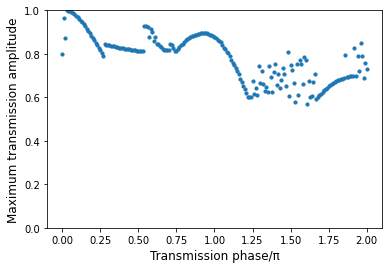

In [5]:
#phase is discritized in 2 dp, find max amplitude at each phase
amplitudes_maxima = []
phases_maxima = []
m_maxima = []
n_maxima = []
t_maxima = []
w_maxima = []
df = pd.DataFrame(dataset)
count = 0
for i in range(201):
  df1 = df[df[1]==count]
  #print(df1)
  id = df1[0].argmax()
  #print(id)
  aa = df1.iat[id, 0]
  m = df1.iat[id, 2]
  n = df1.iat[id, 3]
  t = df1.iat[id, 4]
  w = df1.iat[id, 5]
  #print('aa', id)
  #print(m)
  #print(n)
  #print(t)
  #print(w)
  amplitudes_maxima.append(aa)
  phases_maxima.append(count)
  m_maxima.append(m)
  n_maxima.append(n)
  t_maxima.append(t)
  w_maxima.append(w)
  count += 0.01
  count = round(count, 2)

print(amplitudes_maxima)
print(phases_maxima)
print(t_maxima)
plt.scatter(phases_maxima, amplitudes_maxima, s=10)
plt.xlabel("Transmission phase/π", size=12)
plt.ylabel("Maximum transmission amplitude", size=12)
plt.ylim(0, 1)

print(len(w_maxima))
print(max(phases_maxima))

#dataa = {'Amplitude of transmission coef':amplitudes_maxima, 'Phase of transmission coef':phases_maxima, 'm':m_maxima, 'n':n_maxima, 't':t_maxima, 'w':w_maxima}
#df = pd.DataFrame(dataa)
#df.to_csv('dataset.csv')